In [796]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

loaded_df = pd.read_pickle("ga_df.pkl")
loaded_dict = pd.read_pickle("dna_dict.pkl")

loaded_df.shape

(115, 200)

In [797]:
row_averages = loaded_df.mean(axis=1)  # Compute the average across each row

# Example data (two independent samples)
group1 = row_averages[0:10]
group2 = row_averages[-10:]

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

early_mean = sum(row_averages[0:10])/len(row_averages[0:10])
late_mean = sum(row_averages[-10:])/len(row_averages[-10:])

print(f"T-Early generations mean: {early_mean}")
print(f"T-Late generations mean: {late_mean}")

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-Early generations mean: 0.6838785306122449
T-Late generations mean: 0.685834081632653
T-statistic: -1.5689059211700742
P-value: 0.13408151421119746


In [798]:
max_index = loaded_df.stack().idxmax()  # Returns (row_index, column_name)
print(max_index)

# due to improper indexing this translates to the following for identifying this member:

highest_performer = loaded_dict[23][32]

(22, 'auc_33')


In [799]:
for x in loaded_dict:
    count = 0
    current_gen = loaded_dict[x]
    for item in current_gen:
        if item == highest_performer:
            count += 1
    if count > 0:
        print(x)
        print(count)    

23
1
24
1


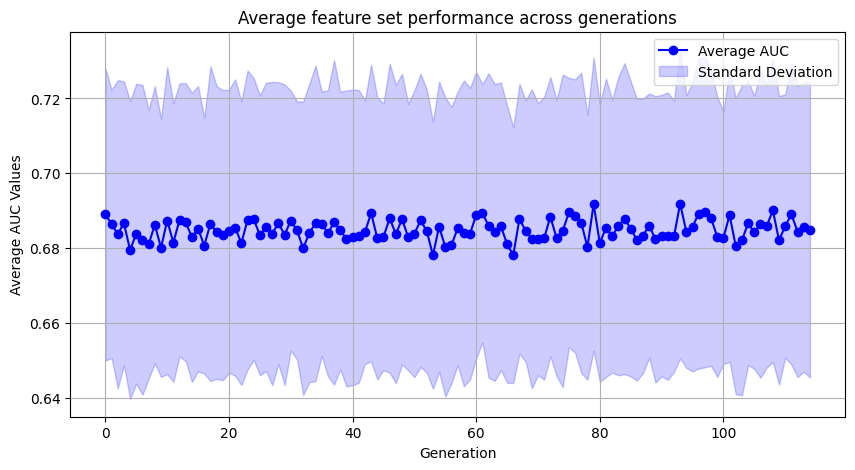

In [800]:
plot_row_averages(loaded_df)

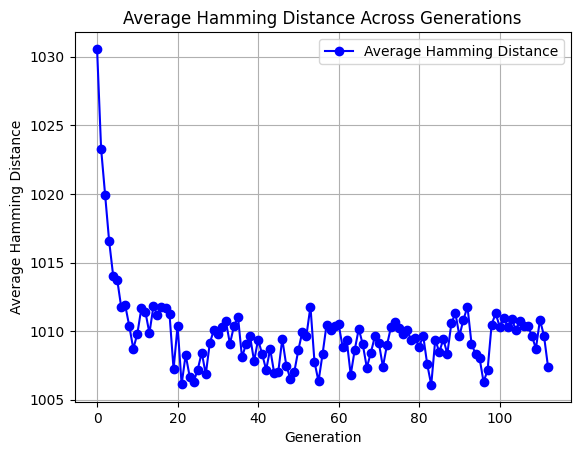

In [720]:
plot_hamming_distance(loaded_dict)

In [562]:
import matplotlib.pyplot as plt

def hamming_distance(vector1, vector2):
    # Ensure both vectors are of the same length
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
    
    # Use zip to iterate over both vectors and sum the differences
    return sum(el1 != el2 for el1, el2 in zip(vector1, vector2))

def plot_hamming_distance(input_dict):
    """ Plots the average hamming distance between all members of each generation
    Takes a dictionary corresponding to a list of lists
    """
    hamming_averages = []
    gen = []
    num_keys = len(input_dict)
    
    # Assuming generations are indexed from 0 to num_keys-1, you can just iterate over the keys
    for i in input_dict:
        current_list = input_dict[i]
        hamming_generation_values = []
        
        for p in range(len(current_list) - 1):
            # Directly use range from p+1 to the end of the list
            relevant_comparisons = range(p + 1, len(current_list))
            for pop_member in relevant_comparisons:
                distance = hamming_distance(input_dict[i][p], input_dict[i][pop_member])
                hamming_generation_values.append(distance)
        
        # Calculate average Hamming distance for this generation
        if hamming_generation_values:  # Avoid division by zero if no comparisons
            current_hamming_average = sum(hamming_generation_values) / len(hamming_generation_values)
        else:
            current_hamming_average = 0  # Or handle in another way if necessary
        
        hamming_averages.append(current_hamming_average)
        gen.append(i)

    # Plot gen averages for hamming distance
    plt.plot(hamming_averages, marker='o', linestyle='-', color='b', label='Average Hamming Distance')
    
    # Plot the shaded region representing the standard deviation (if desired)
    # Calculate standard deviation if needed:
    # hamming_std = [some_function_to_compute_std(hamming_generation_values)]
    # plt.fill_between(gen, hamming_averages - hamming_std, hamming_averages + hamming_std, color='b', alpha=0.1)
    
    plt.xlabel("Generation")
    plt.ylabel("Average Hamming Distance")
    plt.title("Average Hamming Distance Across Generations")
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [560]:
def hamming_distance(vector1, vector2):
    # Ensure both vectors are of the same length
    if len(vector1) != len(vector2):
        raise ValueError("Vectors must be of the same length")
    
    # Use zip to iterate over both vectors and sum the differences
    return sum(el1 != el2 for el1, el2 in zip(vector1, vector2))

def plot_hamming_distance(input_dict):
    """ Plots the average hamming distance between all members of each generation
    Takes a dictionary corresponding to a list of lists
    """
    hamming_averages = []
    gen = []
    num_keys = len(input_dict)
    x = list(range(1, num_keys + 1))
    
    for i in x:
        current_list = loaded_dict[i]
        hamming_generation_values = []
        for p in range(len(current_list) - 1):
            relevant_comparisons = list(range(p, len(current_list)))
            for pop_member in relevant_comparisons:
                distance = hamming_distance(loaded_dict[i][p], loaded_dict[i][pop_member])
                hamming_generation_values.append(distance)
        current_hamming_average = sum(hamming_generation_values) / len(hamming_generation_values)
        hamming_averages.append(current_hamming_average)
        gen.append(i)

    # Plot gen averages for hamming distance
    plt.plot(hamming_averages, marker='o', linestyle='-', color='b', label='Average AUC')
    
    # Plot the shaded region representing the standard deviation
    
    plt.xlabel("Generation")
    plt.ylabel("Average AUC Values")
    plt.title("Average feature set performance across generations")
    plt.legend()
    plt.grid(True)
    
    plt.show()

In [794]:
def plot_row_averages(df):
    """
    Plots the average and standard deviation of each row in the given DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing numerical values.
    """
    row_averages = df.mean(axis=1)  # Compute the average across each row

    row_std = df.std(axis=1)  # Compute the standard deviation across each row
    
    plt.figure(figsize=(10, 5))
    
    # Plot row averages
    plt.plot(row_averages, marker='o', linestyle='-', color='b', label='Average AUC')
    
    # Plot the shaded region representing the standard deviation
    plt.fill_between(range(len(df)), row_averages - row_std, row_averages + row_std, color='b', alpha=0.2, label='Standard Deviation')
    
    plt.xlabel("Generation")
    plt.ylabel("Average AUC Values")
    plt.title("Average feature set performance across generations")
    plt.legend()
    plt.grid(True)
    
    plt.show()

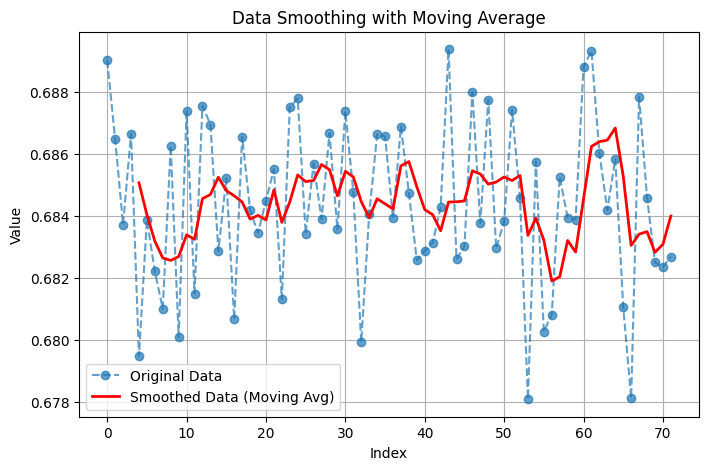

In [677]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (noisy signal)

data = loaded_df.mean(axis=1)  # Compute the average across each row

# Moving average function
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Compute smoothed data
smoothed_data = moving_average(data, window_size=5)

# Plot original and smoothed data
plt.figure(figsize=(8, 5))
plt.plot(data, label='Original Data', linestyle='dashed', marker='o', alpha=0.7)
plt.plot(range(4, len(data)), smoothed_data, label='Smoothed Data (Moving Avg)', color='red', linewidth=2)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Data Smoothing with Moving Average")
plt.legend()
plt.grid()
plt.show()